<a href="https://colab.research.google.com/github/vanoha/Machine-Learning/blob/main/Decision_Tree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree for Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = pd.read_csv('C:/koltcov_python_scripts/ML_social_science_2021/2021_2022/seminars/regression/Decision Tree Regression/petrol_consumption.csv')
# https://www.kaggle.com/harinir/petrol-consumption

We will use this dataset to try and predict gas consumptions 
(in millions of gallons) in 48 US states based upon gas tax (in cents), 
per capita income (dollars), paved highways (in miles) 
and the proportion of population with a drivers license.

In [ ]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
dataset.shape

(48, 5)

In [ ]:
X = dataset.drop('Petrol_Consumption', axis=1).values
y = dataset['Petrol_Consumption']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
29,534,541.0
4,410,414.0
26,577,574.0
30,571,554.0
32,577,631.0
37,704,644.0
34,487,648.0
40,587,649.0
7,467,414.0
10,580,498.0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# расчитываем качество модели линейная регерессия без инетрсепта
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R^2: ', r2_score(y_test, y_pred))

MSE:  3905.4
R^2:  0.33348579386426


In [ ]:
list(dataset)

['Petrol_tax',
 'Average_income',
 'Paved_Highways',
 'Population_Driver_licence(%)',
 'Petrol_Consumption']

In [ ]:
feature_names = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
target_names = ['Petrol_Consumption']

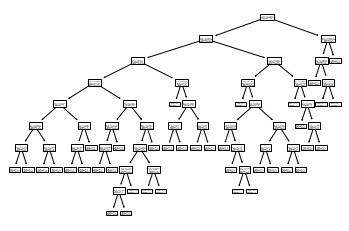

In [ ]:
from sklearn import tree
tree.plot_tree(regressor);

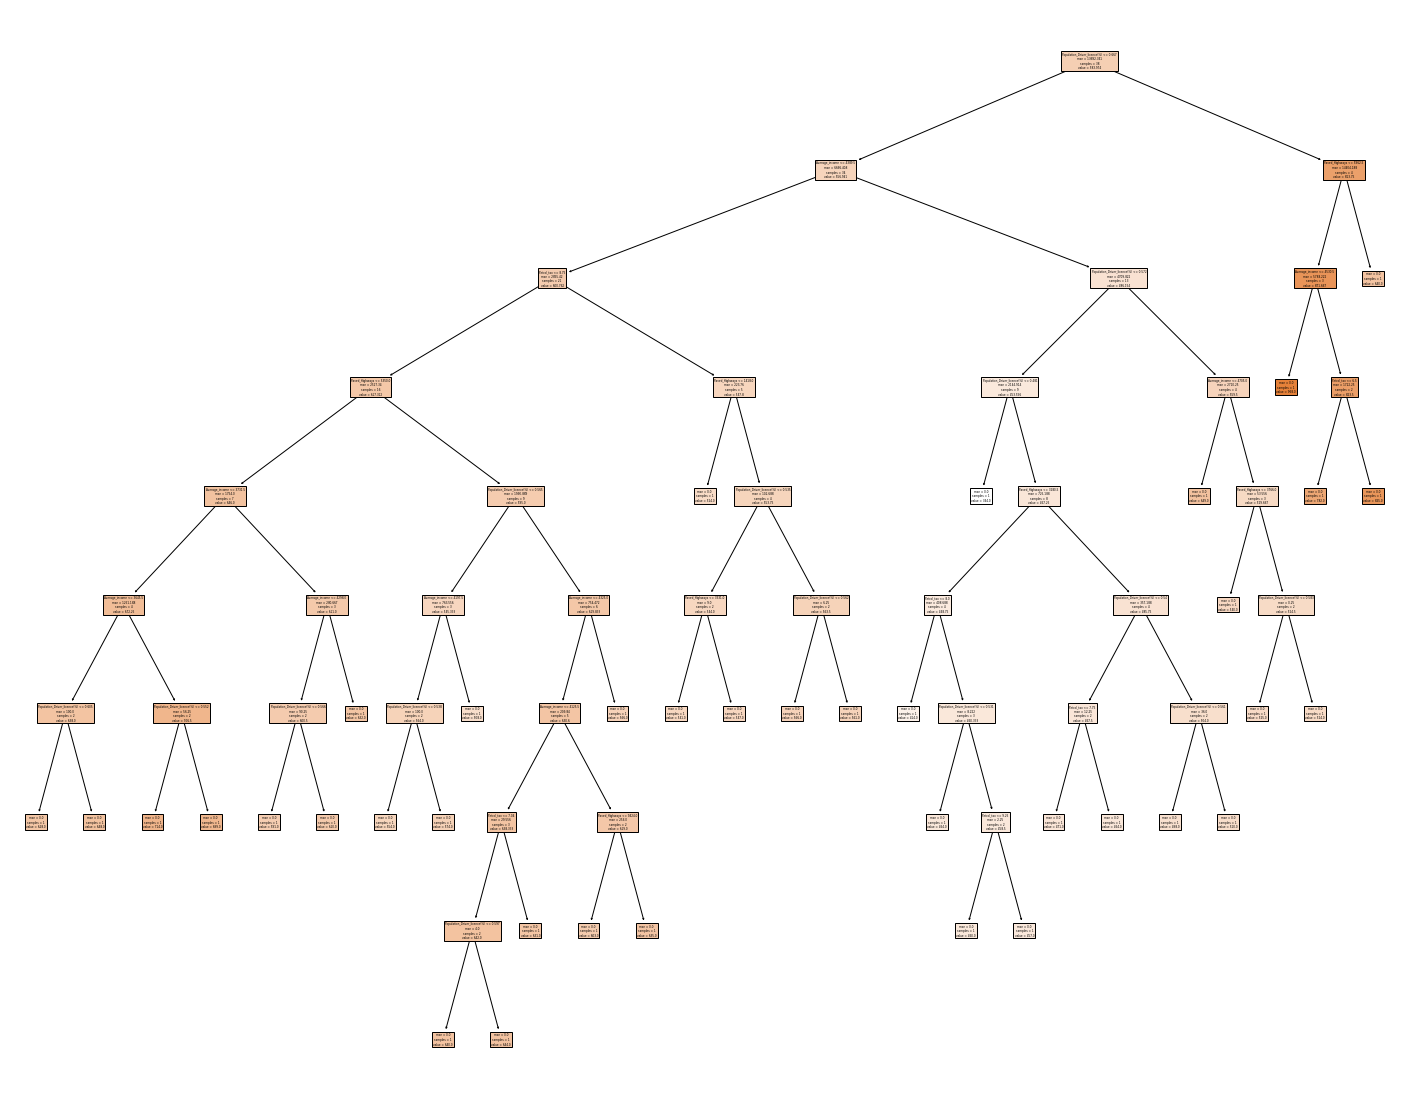

In [ ]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree = tree.plot_tree(regressor, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)

In [ ]:
fig.savefig("decistion_tree.png")

# Decision Trees
https://scikit-learn.org/stable/modules/tree.html

In [ ]:
# список параетров
regressor = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           random_state=None, splitter='best') 
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
# расчитываем качество модели линейная регерессия без инетрсепта
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R^2: ', r2_score(y_test, y_pred))

MSE:  5430.6
R^2:  0.0731878814357686


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
# устанавливаем список глубины дерева
params = {'max_depth':[1,2,3,4,5,6,7,8,9,10,20,35]}
# устанавливаем меру качества
scoring_fnc = 'r2'
# устанавливаем как будем переразбивать наш датасет
cv_sets = ShuffleSplit(n_splits = 20, test_size = 0.20, random_state = 0)
# задаем функцию перебора параметров
grid = GridSearchCV(estimator=regressor, 
                    param_grid=params, scoring=scoring_fnc, cv=cv_sets)
# запускаем процедуру поиска
grid = grid.fit(X, y)
# выводим лушие параметры
print(grid.best_params_)
#print(grid.best_score_)

{'max_depth': 3}


In [ ]:
y_pred = grid.best_estimator_.predict(X)
print('MSE: ', mean_squared_error(y, y_pred))
print('R^2: ', r2_score(y, y_pred))

MSE:  2084.9698547979797
R^2:  0.829904393649262
